## Overview

The MLP (Multi-Layer Perceptron) neural network model for handwritten digit prediction using the MNIST dataset in this example has a simple architecture, described below, along with its functionality.

### Architecture

The first input layer depends on the resolution of the images, which in this case are 28x28 (784 pixels). The second layer contains a total of 128 units, and finally, the last layer has 10 neurons corresponding to the possible digits in the decimal base (0-9).

$$
\text{784 - 128 - 10}
$$

### Activation Functions

For the interests of simplicity, we choose the ReLU (Rectified Linear Unit) activation function for the hidden layer and Sigmoid for the final layer. This is because the Sigmoid function transforms the network's output (which can have any real values) into a value between 0 and 1, allowing each output to be interpreted as the probability of the corresponding class in a binary classification task. However, unlike Softmax, Sigmoid does not ensure that the sum of all outputs equals 1. Instead, each output is treated independently.

$$
\text{ReLU}(z) = \max{(0, z)}
$$

$$
\text{Sigmoid}(Z) = \frac{e^{z_i}}{\sum_{j=1}^K{e^{z_j}}}
$$

And, the derivatives for each function...

$$
\frac{\mathrm{d}}{\mathrm{d}z} \text{ReLU}(z) = 
\begin{cases} 
1 & \text{if } z > 0 \\
0 & \text{if } z \leq 0
\end{cases}
$$

$$
\frac{\mathrm{d}}{\mathrm{d}Z} \text{Sigmoid}(Z) = \text{Sigmoid}(Z) \cdot (1 - \text{Sigmoid}(Z))
$$

### Cost Function

The Categorical Cross-Entropy (CE) function is used in classification problems, particularly when the output of the model is a probability distribution over multiple classes, as in the case of the softmax activation. In this case, the CE measures how well the predicted probability distribution matches the true class labels (0-9).

$$
\mathcal{L} = - \frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{K} y_{ij} \log (\hat{y}_{ij})
$$

Where:
- $y_{ij}$ is the true label (1 if class $j$ is correct, 0 otherwise).
- $\hat{y}_{ij}$ is the predicted probability for class $j$ for example $i$.
- $N$ is the number of training examples.
- $K$ is the number of classes (for MNIST, $K = 10$).

The derivative of the Categorical Cross-Entropy (CE) with respect to the predictions pre-activations is:

$$
\frac{\partial \mathcal{L}}{\partial z_{i}} = \frac{\hat{y}_{i} - y_{i}}{N}
$$

### Optimizer

For the optimizer, we will use MGD (Mini-batch Gradient Descent) with a batch size $m$ of 128. Using the Backpropagation algorithm, we will reduce the loss by updating the parameters according to the differentiation of the previous functions, as shown in the adjacent formulas.

The parameters (weights and biases) are updated as shown below. We introduce a new variable $\delta$, which will be used to optimize the process and make it more manageable in terms of computational resources.

$$
\delta^{L}_i = \frac{\partial{\mathcal{L}}}{\partial{z^L_i}} = \frac{\partial{\mathcal{L}}}{\partial{\hat{y}^L_i}} · \frac{\partial{\hat{y}^L_i}}{\partial{z^L_i}}
$$

For the last layer $L$.

$$
\delta^{(l-1)}_i = \frac{\partial{\mathcal{L}}}{\partial{z^{(l-1)}_i}} = \left(\sum_{j}{\delta^{(l)}_j · w^{(l)}_{ij}}\right) · \frac{\partial{a^{(l-1)}_i}}{\partial{z^{(l-1)}_i}}
$$

For the layer preceding to $l$.

$$
b^{(l)}_i := b^{(l)}_i - \alpha \frac{\partial{\mathcal{L}}}{\partial{b^{(l)}_{i}}} = \delta^{(l)}_i
$$

$$
w^{(l)}_{ij} := w^{(l)}_{ij} - \alpha \frac{\partial{\mathcal{L}}}{\partial{w^{(l)}_{ij}}} = \delta^{(l)}_i · a^{(l-1)}_j
$$

For each iteration.

$$
\theta := \theta - \eta \frac{1}{m} \sum^{m}_{i=1}{\nabla_{\theta} \mathcal{L}(\theta;x^{(i)}, y^{(i)})}
$$

For each batch.

### Hyperparameters

Regarding hyperparameters, we will use standardized values:

$$
\eta: \text{learning rate} = 0.01
$$

$$
m: \text{batch size} = 128
$$



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load Data
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [3]:
# Data division
data = np.array(train_data) # 42_000 examples
test_data = np.array(test_data)   # 28_000 examples (without labels)

m, n = train_data.shape

train_data = data[2000:m].T
X_train = train_data[1: n]
Y_train = train_data[0]

eval_data = data[:2000].T
X_eval = eval_data[1: n]
Y_eval = eval_data[0]

train_data.shape

(785, 40000)

In [4]:
# Data preprocessing
test_data = test_data.reshape(28000, 28, 28)

X_train = X_train.astype(np.float64).T
X_eval = X_eval.astype(np.float64).T

max_val = X_train.max() # 255.0

X_train /= max_val # Normalization
X_eval /= max_val

def one_hot_encode(Y):
    encoded_Y = np.zeros((Y.size, Y.max()+1), dtype=int)
    encoded_Y[np.arange(Y.size), Y] = 1 
    return encoded_Y

Y_train_encoded = one_hot_encode(Y_train)
Y_eval_encoded = one_hot_encode(Y_eval)

X_train.shape, Y_train_encoded.shape

((40000, 784), (40000, 10))

In [5]:
# Model
class MLP:
    def __init__(self, hidden_layer_units = 128):
        self.p = 28*28
        self.h = hidden_layer_units
        self.q = 10
        
        self.init_parameters()
    
    def init_parameters(self):
        # [-0.5, 0.5) distribution
        self.W1 = np.random.rand(self.h, self.p) - 0.5
        self.b1 = np.random.rand(self.h) - 0.5
        self.W2 = np.random.rand(self.q, self.h) - 0.5
        self.b2 = np.random.rand(self.q) - 0.5
    
    @staticmethod
    def relu(z):
        return np.maximum(0, z)

    @staticmethod
    def relu_deriv(z):
        return (z > 0).astype(float)

    @staticmethod
    def sigmoid(z):
        z = np.clip(z, -500, 500) # Avoid possible errors
        return 1 / (1 + np.exp(-z))

    @staticmethod
    def sigmoid_deriv(z):
        s = MLP.sigmoid(z)
        return s * (1 - s)

    @staticmethod
    def loss(pred, true):  # Categorical Cross-Entropy (CE)
        return -np.sum(true * np.log(pred + 1e-8)) / true.shape[0]  # avoid log(0)

    @staticmethod
    def loss_deriv(pred, true):
        return (pred - true) / true.shape[0]
        
    def forward(self, x):
        self.Z1 = self.W1.dot(x) + self.b1
        self.A1 = MLP.relu(self.Z1)
        self.Z2 = self.W2.dot(self.A1) + self.b2
        self.A2 = MLP.sigmoid(self.Z2)
    
    def backward(self, x, y):
        # deltas
        dZ2 = MLP.loss_deriv(self.A2, y)
        dZ1 = self.W2.T.dot(dZ2) * MLP.relu_deriv(self.Z1)

        # gradients
        dW2 = np.outer(dZ2, self.A1)
        db2 = dZ2
        dW1 = np.outer(dZ1, x)
        db1 = dZ1
        
        return dW2, db2, dW1, db1      

    def update_parameters(self, learning_rate, dW2_avg, db2_avg, dW1_avg, db1_avg):
        self.W2 -= learning_rate * dW2_avg
        self.b2 -= learning_rate * db2_avg
        self.W1 -= learning_rate * dW1_avg
        self.b1 -= learning_rate * db1_avg
    
    def train(self, X, Y, epochs = 10, learning_rate = 1e-2, batch_size = 128):
        n = Y.shape[0]
        batches = n // batch_size # Last incomplete batch won't be utilized
        
        # MGD
        for epoch in range(epochs):
            epoch_loss = 0
            
            for batch in range(batches):
                grads_avg = list(map(np.zeros_like, (self.W2, self.b2, self.W1, self.b1)))
                
                for i in range(batch * batch_size, (batch+1) * batch_size):
                    xi = X[i]
                    yi = Y[i]

                    self.forward(xi)
                    loss = MLP.loss(self.A2, yi)
                    epoch_loss += loss
                    
                    grads = self.backward(xi, yi)

                    for grad, grad_avg in zip(grads, grads_avg):
                        grad_avg += grad

                for grad_avg in grads:
                    grad_avg /= batch_size
                    
                self.update_parameters(learning_rate, *grads_avg)
                
            avg_epoch_loss = epoch_loss / (batches * batch_size)
            print(f"Epoch [{epoch + 1}] - Loss: {avg_epoch_loss}")
            
    def evaluate(self, X, Y):
        samples = X.shape[0]
        correct = 0
        for i in range(samples):
            xi = X[i]
            yi = Y[i]
            self.forward(xi)
            pred_class = np.argmax(self.A2)
            true_class = np.argmax(yi)
            if pred_class == true_class:
                correct += 1
        
        accuracy = correct / X.shape[0]
        print(f"Samples: {samples} - Accuracy: {accuracy}")     

# Instatiate the model
mlp = MLP()

In [6]:
# Training and Evaluation
mlp.train(X_train, Y_train_encoded)
mlp.evaluate(X_eval, Y_eval_encoded)

Epoch [1] - Loss: 0.0763370920537275
Epoch [2] - Loss: 0.03754357673716567
Epoch [3] - Loss: 0.030551919587891125
Epoch [4] - Loss: 0.026499887340552412
Epoch [5] - Loss: 0.02369531969936041
Epoch [6] - Loss: 0.02157728143142908
Epoch [7] - Loss: 0.01988299113985059
Epoch [8] - Loss: 0.01849147497019067
Epoch [9] - Loss: 0.01730648360183963
Epoch [10] - Loss: 0.016285131347502937
Samples: 2000 - Accuracy: 0.961


Model prediction: 0


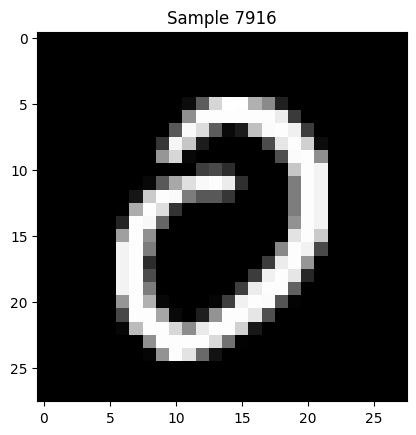

In [7]:
# Tests
sample = np.random.randint(1, test_data.shape[0])
num = test_data[sample]

plt.title(f"Sample {sample}")
plt.imshow(num, cmap="gray")
mlp.forward(num.reshape(28*28))

print(f"Model prediction: {mlp.A2.argmax()}")

>Thanks for reading, \
> Uriel Rubio García | @[urubiog](https://www.github.com/urubiog)